In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/DATASET.csv")
df.head()
df.head(df.shape[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X,Y,LABEL
0,-42,25,6
1,11,-25,3
2,-14,-35,4
3,46,0,4
4,0,35,3
...,...,...,...
295,12,-25,3
296,18,12,3
297,-29,38,6
298,42,35,7


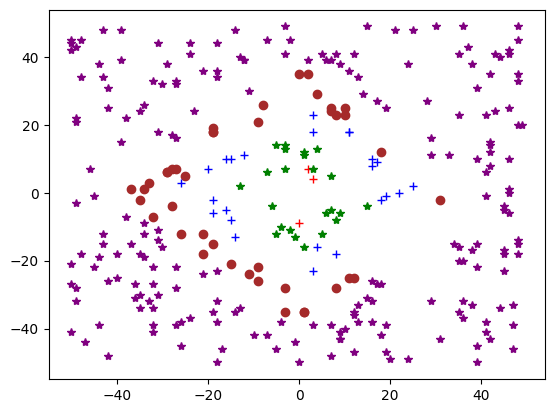

In [16]:
def normalize(input):
  if input == 0:
    return [1, 0, 0, 0, 0]
  elif input == 1:
    return [0, 1, 0, 0, 0]
  elif input == 2:
    return [0, 0, 1, 0, 0]
  elif input == 3:
    return [0, 0, 0, 1, 0]
  elif input == 4:
    return [0, 0, 0, 0, 1]


X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], c="red", marker="+")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i],c="green", marker="*")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="blue", marker="+")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="brown", marker="o")
    else:
        plt.plot(X1[i], X2[i], c="purple", marker="*")

plt.show()

In [20]:
def normalize(input):
  if input == 0:
    return [1, 0, 0, 0, 0]
  elif input == 1:
    return [0, 1, 0, 0, 0]
  elif input == 2:
    return [0, 0, 1, 0, 0]
  elif input == 3:
    return [0, 0, 0, 1, 0]
  elif input == 4:
    return [0, 0, 0, 0, 1]
  else:
    return [0, 0, 0, 0, 0]

features = list(zip(X1, X2))
features_np = np.array(features)

Y2 = np.array([normalize(i) for i in Y])

In [21]:
features_train = features_np[:300]
Y2_train = Y2[:300]

features_test = features_np[300:]
Y2_test = Y2[300:]

In [22]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2,
                 hiddenLayer1Neurons = 10,
                 hiddenLayer2Neurons = 10,
                 hiddenLayer3Neurons = 10,
                 outLayerNeurons = 5,
                 learning_rate = 0.01,
                 activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate


        self.W_IH1 = np.random.randn(inputLayerNeurons,
                                     hiddenLayer1Neurons)

        self.W_H1H2 = np.random.randn(hiddenLayer1Neurons,
                                      hiddenLayer2Neurons)

        self.W_H2H3 = np.random.randn(hiddenLayer2Neurons,
                                      hiddenLayer3Neurons)

        self.W_H3O = np.random.randn(hiddenLayer3Neurons,
                                     outLayerNeurons)



    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return x * (1 - x)
            else:
                return 1 / (1 + np.exp(-x))

        if self.activation_type == "tanh":
            if der == True:
                return 1 - (np.tanh(x))**2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":
            if der == True:
                return -(2 * x * np.exp(-x**2))
            else:
                return np.exp(-x**2)



    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_IH1)
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H1H2)
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H2H3)
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_H3O)
        pred = self.activation(output_input)

        return pred



    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_H3O.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H2H3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_IH1 += X.T.dot(hidden1_delta)
        self.W_H1H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H2H3 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H3O += self.hidden3_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

Epoch: 0, error: 0.36487315423306016
Epoch: 10000, error: 0.08055949967855427
Epoch: 20000, error: 0.07949065330254086
Epoch: 30000, error: 0.07873844387462814
Epoch: 40000, error: 0.07818420023838331
Epoch: 50000, error: 0.07769771563308085
Epoch: 60000, error: 0.07723851136088834
Epoch: 70000, error: 0.07671931041202514
Epoch: 80000, error: 0.07604884397183202
Epoch: 90000, error: 0.0751733540150949


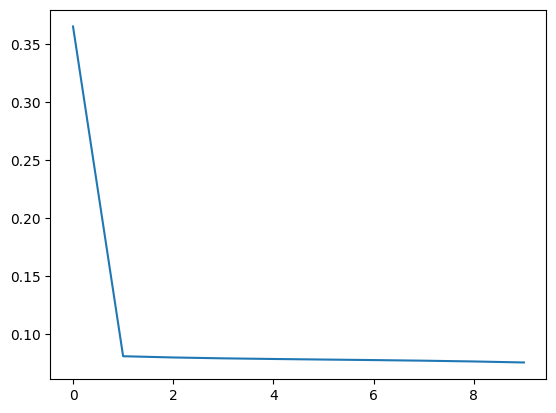

In [23]:
NN = NeuralNetwork(activation_type = 'sigmoid')



err_list = []

for i in range(100000):
    NN.train(features_train, Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()